In [69]:
import pandas as pd
data = pd.read_csv("TheKeplerTable.csv")
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0.811,0,0,0,0,...,761.46,4304.3,1,q1_q17_dr25_tce,5820.0,4.457,0.964,286.80847,49.316399,11.338
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,4148.92,5945.9,1,q1_q17_dr25_tce,6440.0,4.019,1.952,292.24728,47.969521,10.463
2,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0.913,0,0,0,0,...,96.67,862.3,1,q1_q17_dr25_tce,4778.0,4.591,0.763,297.70935,48.080853,9.174
3,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,4055.29,132.7,1,q1_q17_dr25_tce,6244.0,3.657,2.992,294.35654,38.947380,11.432
4,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,0,...,1020.05,380.8,1,q1_q17_dr25_tce,5937.0,4.012,1.787,289.73972,44.647419,11.665


In [70]:
data.shape

(8054, 27)

### Cleaning

In [71]:
data.isnull().sum()

,0
kepid,0
kepoi_name,0
kepler_name,5326
koi_disposition,0
koi_pdisposition,0
koi_score,0
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0


In [72]:
data.dropna(inplace=True)

In [73]:
data.isnull().sum()

,0
kepid,0
kepoi_name,0
kepler_name,0
koi_disposition,0
koi_pdisposition,0
koi_score,0
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0


In [74]:
data.shape

(2727, 27)

In [75]:
data.to_csv("CleanedKeplerTable.csv",index=False)

### Creating a Baseline Model

In [76]:
data.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [77]:
features = data[['koi_score','koi_time0bk',
                 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
                 'koi_insol','koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']]

In [78]:
target = data[['koi_period']]

In [79]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2727 entries, 0 to 7670
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   koi_score     2727 non-null   float64
 1   koi_time0bk   2727 non-null   float64
 2   koi_impact    2727 non-null   float64
 3   koi_duration  2727 non-null   float64
 4   koi_depth     2727 non-null   float64
 5   koi_prad      2727 non-null   float64
 6   koi_teq       2727 non-null   float64
 7   koi_insol     2727 non-null   float64
 8   koi_steff     2727 non-null   float64
 9   koi_slogg     2727 non-null   float64
 10  koi_srad      2727 non-null   float64
 11  ra            2727 non-null   float64
 12  dec           2727 non-null   float64
 13  koi_kepmag    2727 non-null   float64
dtypes: float64(14)
memory usage: 319.6 KB


In [80]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2727 entries, 0 to 7670
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   koi_period  2727 non-null   float64
dtypes: float64(1)
memory usage: 42.6 KB


In [81]:
# Baseline Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 300, oob_score=True)
model.fit(features,target)
oob_score = model.oob_score_
print("Baseline Model OOB Score:",oob_score)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Baseline Model OOB Score: 0.8664948380353947


In [82]:
!pip install rfpimp

### Feature Importances of the Baseline Model

              Importance
Feature                 
koi_insol       0.936442
koi_duration    0.231447
koi_teq         0.121923
koi_srad        0.119374
koi_steff       0.039036
koi_depth       0.019625
koi_score       0.012065
koi_slogg       0.011381
koi_time0bk     0.011348
koi_impact      0.003255
koi_prad        0.002807
ra              0.001735
dec             0.001672
koi_kepmag      0.001342


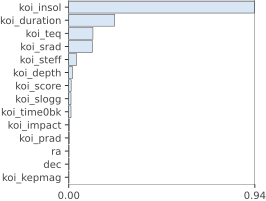

In [83]:
from rfpimp import importances, plot_importances

imp = importances(model, features, target)
print(imp)
plot_importances(imp)

### Training the model after a Train Test Split

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)

In [85]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 300, oob_score=True)
model.fit(X_train,y_train)
oob_score = model.oob_score_
print("The Model OOB Score:",oob_score)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The Model OOB Score: 0.8405726044739537


              Importance
Feature                 
koi_insol       0.831763
koi_teq         0.177900
koi_duration    0.158469
koi_srad        0.112693
koi_steff       0.035959
koi_time0bk     0.031815
koi_depth       0.021732
koi_score       0.014917
koi_slogg       0.011074
koi_impact      0.004046
koi_prad        0.003594
dec             0.002276
koi_kepmag      0.001718
ra              0.001158


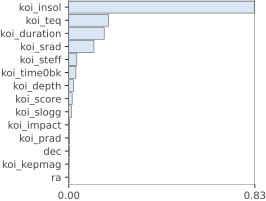

In [86]:
from rfpimp import importances, plot_importances

imp = importances(model, features, target)
print(imp)
plot_importances(imp)

In [87]:
model.predict(X_test)

array([  2.51370926,   0.97566225,   8.25035804,  10.75336273,
         5.51892836,   4.31446176,  13.73497565,   7.28556756,
         5.66750639,   6.97093543,   1.96603205,   4.03876771,
         6.40370385,  20.94581761,  23.37207087,  12.49508367,
        32.69331435,   3.17281095,   8.91739357,  14.71732816,
        20.83079391,  10.41008434,  16.54670391,  31.85868645,
         5.95279688,   6.739295  ,  23.36535425,   5.84577245,
         4.25923695,   2.63380152,  10.23310356,  49.71090002,
         3.0260479 ,  13.54909528,  19.65181809,   3.3809986 ,
         8.20087001,  28.76227355,   3.6916251 ,  12.69439312,
       228.74754556,  18.24790331,  11.72869379,   3.96605349,
        11.90676972,  26.88674213,   4.45896522,   0.64265467,
       118.62399679,  70.27949368,   4.33352472,  94.40119168,
         1.10770225,   6.01687174,  26.58460801,   7.49253857,
         4.5832807 ,  36.68497865,   4.65301787,   4.78268586,
        10.67986727,  10.77450774,  37.64692846,  37.79

In [88]:
model.score(X_train,y_train)

0.9758491988998392

In [89]:
model.score(X_test,y_test)

0.9382521573365479

### K-Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score

kcross_validation = cross_val_score(model, features, target, cv=5, scoring='r2')
mean_cv_score_r2 = kcross_validation.mean()
print("Mean Cross-Validated R-squared:",mean_cv_score_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Mean Cross-Validated R-squared: 0.8727643551674493


### Creating a Final Model

In [91]:
imp_df = pd.DataFrame(imp)

In [92]:
imp_df[imp_df["Importance"]>=0.1]

,Importance
Feature,
koi_insol,0.831763
koi_teq,0.177900
koi_duration,0.158469
koi_srad,0.112693


In [93]:
features = data[["koi_insol","koi_duration","koi_teq","koi_srad"]]

In [94]:
target = data[["koi_period"]]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)

In [96]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300, oob_score=True)
model.fit(X_train,y_train)
oob_score = model.oob_score_
print("The Final Model OOB Score:",oob_score)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The Final Model OOB Score: 0.8649139466240625


              Importance
Feature                 
koi_insol       0.758250
koi_duration    0.299791
koi_srad        0.244183
koi_teq         0.201011


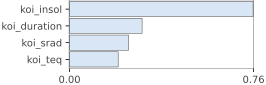

In [97]:
from rfpimp import importances, plot_importances

imp = importances(model, features, target)
print(imp)
plot_importances(imp)

In [98]:
model.predict(X_test)

array([  9.40140485,   7.57265712,  14.85984619, 182.70127892,
        36.41004747,  14.25655275,   1.7812745 ,  19.75640546,
         1.13414864,   8.2065066 ,   3.7103815 ,   0.68017693,
        57.94092448,   2.8040507 ,  20.52692588,   6.18481909,
        65.88728733,  29.75747492,   8.90315662,   6.36120434,
       151.62004967,  12.00997574,   4.17220173,  11.47216971,
        23.97340785,   6.45698233,   2.12488304,   8.33067661,
        11.35787917,  13.64975614,  26.62215037,   5.02573366,
        14.06032862,  38.65965039,  10.9923171 ,  13.25759938,
       126.01319507,  12.63879831,  10.21808387,  25.34043751,
         7.45372651,   1.88372869,  10.11000163,  16.12947815,
        33.90350696,  55.41165092,  43.80954617,   9.03740927,
         1.47923497,   5.42961858,  37.70775237,  23.95768554,
        14.71368119,   2.81154543,   2.95114328,   3.71716728,
        25.9828247 ,  15.98527886,  26.80640241,  39.50044886,
         6.58742278,  28.99258639,   2.38652542,  16.85

In [99]:
model.score(X_train,y_train)

0.9813678769411217

In [100]:
model.score(X_test,y_test)

0.9220620550499868

In [101]:
from sklearn.model_selection import cross_val_score

kcross_validation = cross_val_score(model, features, target, cv=5, scoring='r2')
mean_cv_score_r2 = kcross_validation.mean()
print("Mean Cross-Validated R-squared:",mean_cv_score_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Mean Cross-Validated R-squared: 0.8783934277428482
